In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("good_and_bad_coils_10_meter_sampling_combined_added_gauge_target.csv")

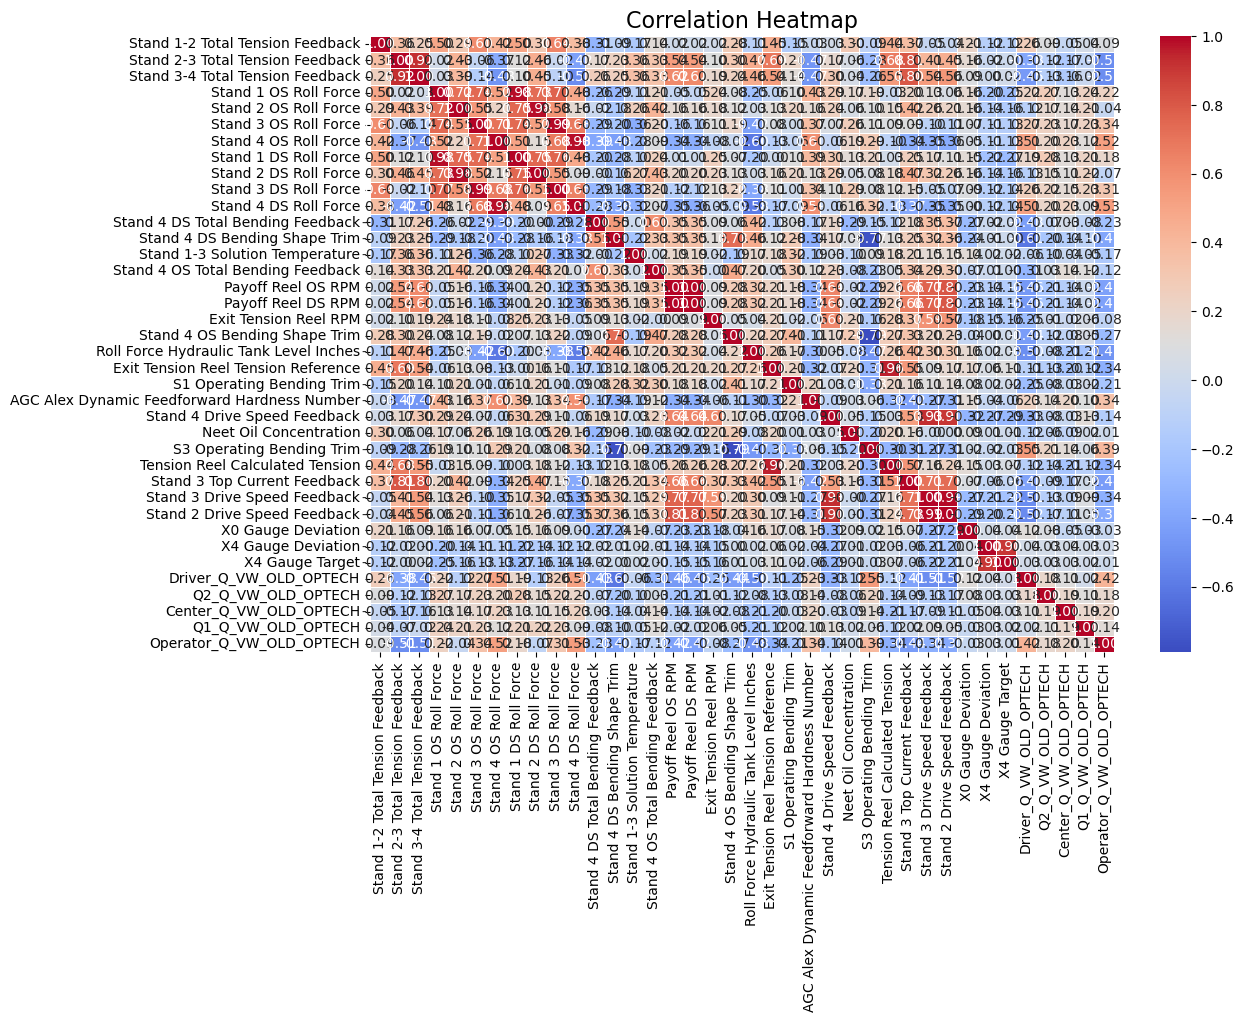

In [7]:
data = df[["Stand 1-2 Total Tension Feedback",
    "Stand 2-3 Total Tension Feedback",
    "Stand 3-4 Total Tension Feedback",
    "Stand 1 OS Roll Force",
    "Stand 2 OS Roll Force",
    "Stand 3 OS Roll Force",
    "Stand 4 OS Roll Force",
    "Stand 1 DS Roll Force",
    "Stand 2 DS Roll Force",
    "Stand 3 DS Roll Force",
    "Stand 4 DS Roll Force",
    "Stand 4 DS Total Bending Feedback",
    "Stand 4 DS Bending Shape Trim",
    "Stand 1-3 Solution Temperature",
    "Stand 4 OS Total Bending Feedback",
    "Payoff Reel OS RPM",
    "Payoff Reel DS RPM",
    "Exit Tension Reel RPM",
    "Stand 4 OS Bending Shape Trim",
    "Roll Force Hydraulic Tank Level Inches",
    "Exit Tension Reel Tension Reference",
    "S1 Operating Bending Trim",
    "AGC Alex Dynamic Feedforward Hardness Number",
    "Stand 4 Drive Speed Feedback",
    "Neet Oil Concentration",
    "S3 Operating Bending Trim",
    "Tension Reel Calculated Tension",
    "Stand 3 Top Current Feedback",
    "Stand 3 Drive Speed Feedback",
    "Stand 2 Drive Speed Feedback",
    "X0 Gauge Deviation",
    "X4 Gauge Deviation",
    "X4 Gauge Target",
    'Driver_Q_VW_OLD_OPTECH','Q2_Q_VW_OLD_OPTECH','Center_Q_VW_OLD_OPTECH','Q1_Q_VW_OLD_OPTECH','Operator_Q_VW_OLD_OPTECH']].copy()
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [8]:
data.dropna(inplace=True)

In [9]:
X = data[["Stand 1-2 Total Tension Feedback",
    "Stand 2-3 Total Tension Feedback",
    "Stand 3-4 Total Tension Feedback",
    "Stand 1 OS Roll Force",
    "Stand 2 OS Roll Force",
    "Stand 3 OS Roll Force",
    "Stand 4 OS Roll Force",
    "Stand 1 DS Roll Force",
    "Stand 2 DS Roll Force",
    "Stand 3 DS Roll Force",
    "Stand 4 DS Roll Force",
    "Stand 4 DS Total Bending Feedback",
    "Stand 4 DS Bending Shape Trim",
    "Stand 1-3 Solution Temperature",
    "Stand 4 OS Total Bending Feedback",
    "Payoff Reel OS RPM",
    "Payoff Reel DS RPM",
    "Exit Tension Reel RPM",
    "Stand 4 OS Bending Shape Trim",
    "Roll Force Hydraulic Tank Level Inches",
    "Exit Tension Reel Tension Reference",
    "S1 Operating Bending Trim",
    "AGC Alex Dynamic Feedforward Hardness Number",
    "Stand 4 Drive Speed Feedback",
    "Neet Oil Concentration",
    "S3 Operating Bending Trim",
    "Tension Reel Calculated Tension",
    "Stand 3 Top Current Feedback",
    "Stand 3 Drive Speed Feedback",
    "Stand 2 Drive Speed Feedback",
    "X0 Gauge Deviation",
    "X4 Gauge Deviation","X4 Gauge Target"]].copy()
y = data[['Driver_Q_VW_OLD_OPTECH','Q2_Q_VW_OLD_OPTECH','Center_Q_VW_OLD_OPTECH','Q1_Q_VW_OLD_OPTECH',
       'Operator_Q_VW_OLD_OPTECH']].copy()

In [10]:
len(y),len(y.dropna())

(30013, 30013)

In [97]:
# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # ---------------------------
# # Build XGBoost Regressor for Multi-Output
# # ---------------------------
# base_model = XGBRegressor(
#     n_estimators=200,
#     learning_rate=0.05,
#     max_depth=6,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     tree_method="hist"  # use "gpu_hist" if GPU available
# )

# model = MultiOutputRegressor(base_model)

# # ---------------------------
# # Train
# # ---------------------------
# model.fit(X_train, y_train)

# # ---------------------------
# # Evaluate
# # ---------------------------
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print(f"Test MSE: {mse:.4f}, MAE: {mae:.4f}")

# # ---------------------------
# # Sample Predictions
# # ---------------------------
# print("Sample Predictions:\n", y_pred[:5])
# r2_per_target = r2_score(y_test, y_pred, multioutput="raw_values")
# print("R² per output column:", r2_per_target)

Test MSE: 1.5988, MAE: 0.8165
Sample Predictions:
 [[2.6933613 1.3451084 1.2307445 0.9402742 2.882553 ]
 [3.4154139 1.1242902 1.0090098 1.3467212 3.0078375]
 [3.4635787 1.5430012 1.3134073 2.2458723 4.6654053]
 [2.0324173 2.1627936 1.4263476 3.318135  3.262481 ]
 [2.2440422 1.722004  2.0594287 1.8570305 3.071807 ]]
R² per output column: [0.76454948 0.22648787 0.18181901 0.23809407 0.38558369]


In [ ]:
# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # ---------------------------
# # Build MLP Model
# # ---------------------------
# model = Sequential([
#     Dense(64, input_dim=14, activation='relu'),   # hidden layer 1
#     Dense(32, activation='relu'),                 # hidden layer 2
#     Dense(32, activation='relu'),                 # hidden layer 2
#     Dense(32, activation='relu'),                 # hidden layer 2
#     Dense(5, activation='linear')                 # output layer (5 outputs)
# ])

# # ---------------------------
# # Compile Model
# # ---------------------------
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#               loss='mse',    # for regression with 5 outputs
#               metrics=['mae'])

# # ---------------------------
# # Train Model
# # ---------------------------
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_test, y_test),
#                     epochs=10, batch_size=32, verbose=1)

# # ---------------------------
# # Evaluate
# # ---------------------------
# loss, mae = model.evaluate(X_test, y_test, verbose=0)
# print(f"Final Test Loss: {loss:.4f}, MAE: {mae:.4f}")

# # ---------------------------
# # Predict
# # ---------------------------
# preds = model.predict(X_test[:5])
# print("Sample Predictions:\n", preds)

# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print(f"Test MSE: {mse:.4f}, MAE: {mae:.4f}")

# # ---------------------------
# # Sample Predictions
# # ---------------------------
# print("Sample Predictions:\n", y_pred[:5])
# r2_per_target = r2_score(y_test, y_pred, multioutput="raw_values")
# print("R² per output column:", r2_per_target)

Epoch 1/10
 37/516 [=>............................] - ETA: 1s - loss: 184.7074 - mae: 6.4679   

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Ensure numpy arrays
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)
# ---------------------------
# ANN: One model per target
# ---------------------------
ann_models = []
y_pred_ann = np.zeros_like(y_test)

for i in range(y.shape[1]):  # loop over target columns
    model = Sequential([
        Dense(64, input_dim=X.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train[:, i], epochs=30, batch_size=32, verbose=0)
    
    ann_models.append(model)
    y_pred_ann[:, i] = model.predict(X_test).flatten()

print("\n--- ANN Results ---")
print("MSE:", mean_squared_error(y_test, y_pred_ann))
print("MAE:", mean_absolute_error(y_test, y_pred_ann))
print("R² :", r2_score(y_test, y_pred_ann, multioutput="uniform_average"))
print("R² per target:", r2_score(y_test, y_pred_ann, multioutput="raw_values"))

# ---------------------------
# XGBoost: One model per target
# ---------------------------
xgb_models = []
y_pred_xgb = np.zeros_like(y_test)

for i in range(y.shape[1]):  # loop over target columns
    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist"
    )
    model.fit(X_train, y_train[:, i])
    
    xgb_models.append(model)
    y_pred_xgb[:, i] = model.predict(X_test)

print("\n--- XGBoost Results ---")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R² :", r2_score(y_test, y_pred_xgb, multioutput="uniform_average"))
print("R² per target:", r2_score(y_test, y_pred_xgb, multioutput="raw_values"))


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- ANN Results ---
MSE: 2.8066401205351434
MAE: 1.206796412240394
R² : -0.40717795502797494
R² per target: [ 0.55681386 -1.87270319 -0.42357178 -0.00253129 -0.29389738]

--- XGBoost Results ---
MSE: 0.9510750335609235
MAE: 0.6042593369664933
R² : 0.45165128358467205
R² per target: [0.86322315 0.25137051 0.24634321 0.27672244 0.62059712]


In [12]:
signal_features = X

## XGB Feature Importance

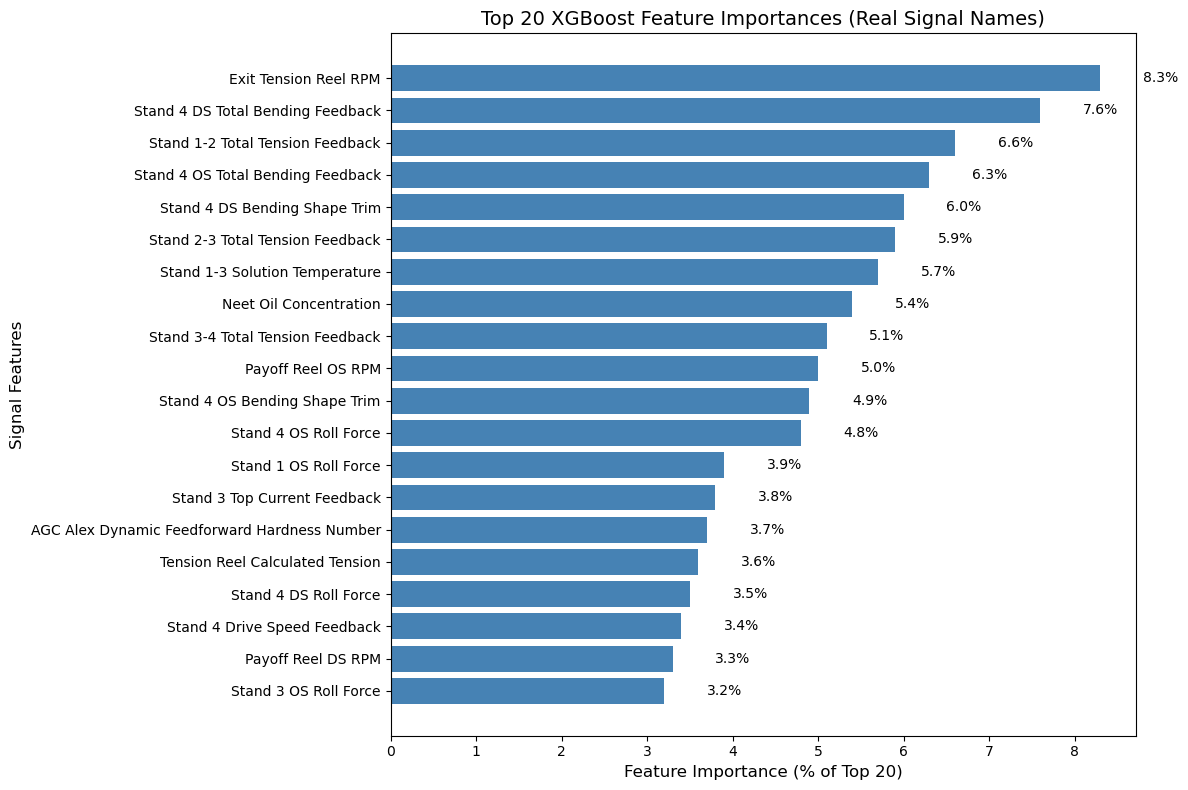

Top 20 XGBoost Features with Real Signal Names:
                                              Importance (%)
Exit Tension Reel RPM                                    8.3
Stand 4 DS Total Bending Feedback                        7.6
Stand 1-2 Total Tension Feedback                         6.6
Stand 4 OS Total Bending Feedback                        6.3
Stand 4 DS Bending Shape Trim                            6.0
Stand 2-3 Total Tension Feedback                         5.9
Stand 1-3 Solution Temperature                           5.7
Neet Oil Concentration                                   5.4
Stand 3-4 Total Tension Feedback                         5.1
Payoff Reel OS RPM                                       5.0
Stand 4 OS Bending Shape Trim                            4.9
Stand 4 OS Roll Force                                    4.8
Stand 1 OS Roll Force                                    3.9
Stand 3 Top Current Feedback                             3.8
AGC Alex Dynamic Feedforward Hardness

In [13]:
# Get the real feature names from signal_features
real_feature_names = signal_features

# Create mapping from XGBoost encoded names (f0, f1, f2, ...) to real names
feature_mapping = {}
for i, real_name in enumerate(real_feature_names):
    feature_mapping[f'f{i}'] = real_name

# Step 1: Raw importance from XGBoost model (using first model as example)
model = xgb_models[0]  # You can change this to any of your XGB models
raw_importance = model.get_booster().get_score(importance_type='weight')  # or 'gain', 'cover'

# Step 2: Convert encoded names to real names
real_importance = {}
for encoded_name, importance in raw_importance.items():
    real_name = feature_mapping.get(encoded_name, encoded_name)  # fallback to encoded if not found
    real_importance[real_name] = importance

# Step 3: Create DataFrame with real names
df_imp = pd.DataFrame.from_dict(real_importance, orient='index', columns=['Importance'])
df_imp['Importance'] = df_imp['Importance'].astype(float)

# Step 4: Sort and select top 20
df_top20 = df_imp.sort_values('Importance', ascending=False).head(20) 
df_top20['Importance (%)'] = 100 * df_top20['Importance'] / df_top20['Importance'].sum()

# Round for display
df_top20['Importance (%)'] = df_top20['Importance (%)'].round(1)

# Adjust largest value so total is exactly 100%
total = df_top20['Importance (%)'].sum()
diff = 100.0 - total
if abs(diff) > 0 and len(df_top20) > 0:
    i_max = df_top20['Importance (%)'].idxmax()
    df_top20.at[i_max, 'Importance (%)'] += diff

# Step 5: Plot with real feature names
plt.figure(figsize=(12, 8))
bars = plt.barh(df_top20.index[::-1], df_top20['Importance (%)'][::-1], color='steelblue')

# Add percentage labels
for index, value in enumerate(df_top20['Importance (%)'][::-1]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=10)

plt.xlabel("Feature Importance (% of Top 20)", fontsize=12)
plt.ylabel("Signal Features", fontsize=12)
plt.title("Top 20 XGBoost Feature Importances (Real Signal Names)", fontsize=14)
plt.tight_layout()
plt.show()

# Display the table with real names
print("Top 20 XGBoost Features with Real Signal Names:")
print("=" * 60)
print(df_top20[['Importance (%)']].to_string(float_format='%.1f'))

print(f"\nTotal: {df_top20['Importance (%)'].sum():.1f}%")
print(f"Number of features: {len(df_top20)}")

## ANN Feature Importance

In [ ]:
# ANN Feature Importance using Permutation Importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def permutation_importance_ann(models, X_test, y_test, feature_names, n_repeats=10):
    """
    Calculate permutation importance for ANN models
    
    Parameters:
    - models: list of trained ANN models (one per target)
    - X_test: test features
    - y_test: test targets
    - feature_names: list of feature names
    - n_repeats: number of permutation repeats for stability
    
    Returns:
    - DataFrame with feature importance scores
    """
    
    # Get baseline performance (MSE for all targets combined)
    y_pred_baseline = np.zeros_like(y_test)
    for i, model in enumerate(models):
        y_pred_baseline[:, i] = model.predict(X_test).flatten()
    
    baseline_mse = mean_squared_error(y_test, y_pred_baseline)
    print(f"Baseline MSE: {baseline_mse:.4f}")
    
    # Store importance scores
    importance_scores = []
    
    # Loop through each feature
    for feature_idx in range(X_test.shape[1]):
        feature_name = feature_names[feature_idx]
        
        # Store scores for this feature across repeats
        feature_scores = []
        
        for repeat in range(n_repeats):
            # Create copy of test data
            X_test_permuted = X_test.copy()
            
            # Permute (shuffle) this feature
            np.random.seed(repeat * 100 + feature_idx)  # For reproducibility
            X_test_permuted[:, feature_idx] = np.random.permutation(X_test_permuted[:, feature_idx])
            
            # Get predictions with permuted feature
            y_pred_permuted = np.zeros_like(y_test)
            for i, model in enumerate(models):
                y_pred_permuted[:, i] = model.predict(X_test_permuted).flatten()
            
            # Calculate MSE with permuted feature
            permuted_mse = mean_squared_error(y_test, y_pred_permuted)
            
            # Importance = increase in MSE (higher = more important)
            importance = permuted_mse - baseline_mse
            feature_scores.append(importance)
        
        # Average across repeats
        avg_importance = np.mean(feature_scores)
        std_importance = np.std(feature_scores)
        
        importance_scores.append({
            'feature': feature_name,
            'importance': avg_importance,
            'std': std_importance
        })
        
        print(f"Feature {feature_idx + 1}/{len(feature_names)}: {feature_name}")
    
    # Create DataFrame
    df_importance = pd.DataFrame(importance_scores)
    
    return df_importance

# Calculate permutation importance for ANN
print("Calculating ANN Feature Importance using Permutation Method...")
print("This may take a few minutes...")

# Get the real feature names
real_feature_names = signal_features

# Calculate importance
df_ann_importance = permutation_importance_ann(
    models=ann_models,
    X_test=X_test,
    y_test=y_test,
    feature_names=real_feature_names,
    n_repeats=5  # Reduce if too slow
)

# Sort by importance (descending)
df_ann_importance = df_ann_importance.sort_values('importance', ascending=False)

# Get top 20 features
df_ann_top20 = df_ann_importance.head(20).copy()

# Convert to percentage (relative importance)
total_importance = df_ann_top20['importance'].sum()
df_ann_top20['Importance (%)'] = 100 * df_ann_top20['importance'] / total_importance

# Round for display
df_ann_top20['Importance (%)'] = df_ann_top20['Importance (%)'].round(1)

# Adjust largest value so total is exactly 100%
total_pct = df_ann_top20['Importance (%)'].sum()
diff = 100.0 - total_pct
if abs(diff) > 0 and len(df_ann_top20) > 0:
    i_max = df_ann_top20['Importance (%)'].idxmax()
    df_ann_top20.at[i_max, 'Importance (%)'] += diff

# Set feature names as index for plotting
df_ann_top20_plot = df_ann_top20.set_index('feature')

# Plot ANN feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(df_ann_top20_plot.index[::-1], df_ann_top20_plot['Importance (%)'][::-1], 
                color='darkgreen', alpha=0.7)

# Add percentage labels
for index, value in enumerate(df_ann_top20_plot['Importance (%)'][::-1]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=10)

plt.xlabel("Feature Importance (% of Top 20)", fontsize=12)
plt.ylabel("Signal Features", fontsize=12)
plt.title("Top 20 ANN Feature Importances (Permutation Method)", fontsize=14)
plt.tight_layout()
plt.show()

# Display the results
print("\nTop 20 ANN Features using Permutation Importance:")
print("=" * 70)
display_df = df_ann_top20[['feature', 'Importance (%)']].copy()
display_df.index = range(1, len(display_df) + 1)
print(display_df.to_string(index=True, float_format='%.1f'))
print(f"\nTotal: {df_ann_top20['Importance (%)'].sum():.1f}%")
print(f"Number of features: {len(df_ann_top20)}")

# Optional: Compare with XGBoost
print("\n" + "="*80)
print("COMPARISON: Top 10 Features")
print("="*80)

# Get top 10 from each method
xgb_top10 = df_top20.head(10).index.tolist()
ann_top10 = df_ann_top20.head(10)['feature'].tolist()

print("XGBoost Top 10:", xgb_top10[:5], "...")
print("ANN Top 10:    ", ann_top10[:5], "...")

# Find common features
common_features = set(xgb_top10) & set(ann_top10)
print(f"\nCommon features in top 10: {len(common_features)}")
if common_features:
    print("Common features:", list(common_features))